Алгоритм бустинга в общем:
1. Извлечь случайное подмножество тренировочных образцов $d_1$ без возврата из тренировочного набора $D$ для тренировки слабого ученика C_1
2. Извлечь следующее случайное поднмножество тренировочных образцов $d_2$ без возврата и добавить 50% ранее ошибочно классифицированных образцов для тренировки слабого ученика $C_2$
3. Найти в тренировочном наборе $D$ тренировочных образцы $d_3$, по которым $C_1$ и $С_2$ расходятся, для тренировки третьего слабого ученика $C_3$. 
4. Объединить слабых учеников $C_1$, $C_2$, $C_3$ с помощью мажоритарного голосования

AdaBoost - adaptive boosting - адаптивный бустинг, подстраивается под сложные объекты при обучении
Алгоритм AdaBoost:
1. Назначить весовому вектору $w$ равномерные веса, где $ \sum_iw_i=1$
2. Для j в m раундах бустинга следать следущее:
    1. Натренировать взвешенного слабого ученика $C_j=train(X, y, x)$
    2. Идентифицировать метки классов $\hat{y}=predict(C_j, X)$
    3. Вычислить взвешенную частоту появления ошибок $\epsilon=w*(\hat{y}\not=y)$
    4. Вычислить коэффициент $a_j=0.5*log\frac{1-\epsilon}{\epsilon}$
    5. Обновить веса $w: w \times exp (-a_j \times \hat{y} \times y)$

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv('../data/wine/wine.data')
df.columns = ['Label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium',
              'Total phenols', 'Flavanoids',
              'Nonflavanoid phenols', 'Proanthocyanins',
              'Color intensity', 'Hue', 'OD280_OD315',
              'Proline']
df = df[df['Label'] != 1]
y = df['Label'].values
X = df[['Alcohol', 'Hue']].values

le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,
                                                    random_state=1)

In [11]:
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1,
                              random_state=0)
ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=.1,
                         random_state=0)

tree.fit(X_train, y_train)
tree_train = accuracy_score(y_train, tree.predict(X_train))
tree_test = accuracy_score(y_test, tree.predict(X_test))
print(f'Tree train/test accuracy score: {tree_train:.3f}/{tree_test:.3f}')

ada.fit(X_train, y_train)
ada_train = accuracy_score(y_train, ada.predict(X_train))
ada_test = accuracy_score(y_test, ada.predict(X_test))
print(f'AdaBoost train/test accuracy score: {ada_train:.3f}/{ada_test:.3f}')

Tree train/test accuracy score: 0.845/0.854
AdaBoost train/test accuracy score: 1.000/0.875


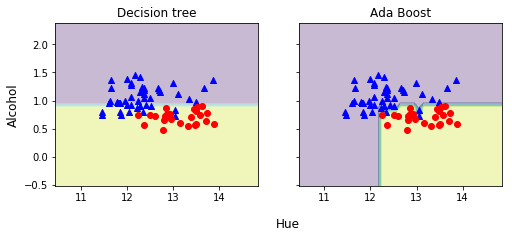

In [16]:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))
f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col', 
                        sharey='row',
                        figsize=(8, 3))
for idx, clf, tt in zip([0, 1],
                        [tree, ada],
                        ['Decision tree', 'Ada Boost']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=.3)
    axarr[idx].scatter(X_train[y_train==0, 0],
                       X_train[y_train==0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],
                       X_train[y_train==1, 1],
                       c='red', marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2,
         s='Hue', fontsize=12,
         ha='center', va='center')
plt.show()